In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1707925375000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1707923092000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-1.zip', name='clinicaltrial_2020-1.zip', size=10599182, modificationTime=1708760456000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1708765904000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1708760380000

In [0]:
fileroot = "clinicaltrial_2023_1"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

Out[2]: True

In [0]:
import os
os.environ['fileroot'] = fileroot

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2023_1.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)

Out[5]: True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "/FileStore/tables/clinicaltrial_2023.csv", True)

Out[6]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[7]: [FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1707925375000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1707923092000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-1.zip', name='clinicaltrial_2020-1.zip', size=10599182, modificationTime=1708760456000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1708765904000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1708760380000

In [0]:
fileroot = "pharma"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

Out[8]: True

In [0]:
import os
os.environ['fileroot'] = fileroot

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma.csv", True)

Out[11]: True

In [0]:
fileroot = "clinicaltrial_2021"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

Out[12]: True

In [0]:
import os
os.environ['fileroot'] = fileroot

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/clinicaltrial_2021.csv", True)

Out[20]: True

In [0]:
fileroot = "clinicaltrial_2020"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

Out[18]: True

In [0]:
import os
os.environ['fileroot'] = fileroot

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  


In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "/FileStore/tables/clinicaltrial_2020.csv", True)

Out[21]: True

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col
from pyspark.sql.types import StructType, StructField, StringType

# Start Spark session
spark = SparkSession.builder.appName("clinicial").getOrCreate()

# Define the schema based on the provided fields
schema = StructType([
    StructField("Id", StringType(), True),
    StructField("Study Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Study Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),
    StructField("Funder Type", StringType(), True),
    StructField("Study Type", StringType(), True),
    StructField("Study Design", StringType(), True),
    StructField("Start Date", StringType(), True),
    StructField("Completion Date", StringType(), True)
])

# Load data as a single column of text
data_path = "/FileStore/tables/clinicaltrial_2023.csv"
df_raw = spark.read.text(data_path)

# Correctly split the "value" column by actual tab character
df_processed = df_raw.withColumn("value", split(col("value"), "\t"))

# Extract columns based on the schema
# Adjust the indexing if necessary to skip any header-like rows repeated in the data
df_final = df_processed.select([df_processed["value"].getItem(i).alias(field.name) for i, field in enumerate(schema.fields)])

df_filtered = df_final.filter(df_final["Id"] != "\"Id")
# Optionally, filter out the first row if it's a header or any non-data row
# Here, you would need a condition to identify such rows, like checking if "Id" matches a pattern

# Show the DataFrame to verify correct loading
df_filtered.show(5, truncate=False)


+------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------+------------------------------------------------------------------------------------+----------+-----------+--------------+----------------------------------------------------------------------------------------------------------------------------------------------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Id          |Study Title                                               

In [0]:
from pyspark.sql.functions import col, count, lit, when
from pyspark.sql.window import Window

# Function to calculate mode for a given column
def calculate_mode(df, column_name):
    # Group by the column, count occurrences, and order to find the mode
    mode_df = df.groupBy(column_name) \
                .agg(count(lit(1)).alias("freq")) \
                .orderBy(col("freq").desc())
    
    # Get the most frequent value (mode)
    mode_value = mode_df.first()[0]
    return mode_value

# Function to fill missing values with mode for each specified column
def fill_with_mode(df, columns):
    for column in columns:
        mode_value = calculate_mode(df.filter(col(column).isNotNull()), column)
        # Fill missing values in the DataFrame with the mode
        df = df.withColumn(column, when(col(column).isNull(), mode_value).otherwise(col(column)))
    return df

# Columns to fill with mode
columns_to_fill = ["Study Title", "Acronym", "Study Status", "Conditions", "Interventions", "Sponsor", "Collaborators", "Enrollment", "Funder Type", "Study Type", "Study Design", "Start Date"]

# Apply the function to fill missing values with mode
df_filled_with_mode = fill_with_mode(df_filtered, columns_to_fill)

# Show the DataFrame to verify that missing values are filled
df_filled_with_mode.show(5, truncate=False)


+------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------+------------------------------------------------------------------------------------+----------+-----------+--------------+----------------------------------------------------------------------------------------------------------------------------------------------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Id          |Study Title                                               

In [0]:
from pyspark.sql.functions import when, trim, col

# List of string columns to check for spaces and replace with "Unknown"
columns_to_fill = ["Study Title", "Acronym", "Study Status", "Conditions", "Interventions", "Sponsor", "Collaborators", "Enrollment", "Funder Type", "Study Type", "Study Design", "Start Date"] # Add other string columns as needed

for column in columns_to_fill:
    df_filled_with_mode = df_filled_with_mode.withColumn(column, when(trim(col(column)) == "", "Unknown").otherwise(col(column)))


In [0]:
from pyspark.sql.functions import to_date, month, year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Start Date' and 'Completion Date' to date type
df_filled = df_filled_with_mode.withColumn("Start Date", to_date("Start Date", "MM/dd/yyyy")) \
                     .withColumn("Completion Date", to_date("Completion Date", "MM/dd/yyyy"))

# Filter for completed studies in 2023
completed_studies_2023 = df_filled.filter((year(col("Completion Date")) == 2023) & (col("Study Status") == "Completed"))

# Group by month and count
completed_studies_by_month = completed_studies_2023.groupBy(month("Completion Date").alias("Month")).count().orderBy("Month")

# Convert to Pandas DataFrame for plotting
pd_df = completed_studies_by_month.toPandas()

if not pd_df.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Month", y="count", data=pd_df)
    plt.title('Number of Completed Studies Each Month in 2023')
    plt.xlabel('Month')
    plt.ylabel('Number of Completed Studies')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No completed studies found for 2023.")


No completed studies found for 2023.


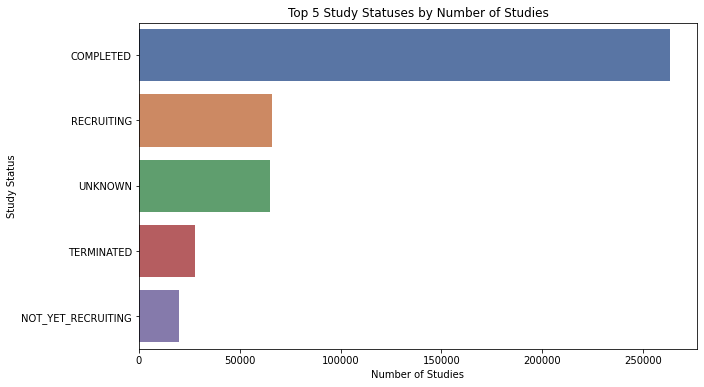

In [0]:
# Order by 'count' in descending order and take the top 5
top_status_distribution = df_filled_with_mode.groupBy("Study Status").count().orderBy("count", ascending=False).limit(5)

# Convert to Pandas DataFrame for plotting
top_pd_status_df = top_status_distribution.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="Study Status", data=top_pd_status_df, palette="deep")
plt.title('Top 5 Study Statuses by Number of Studies')
plt.xlabel('Number of Studies')
plt.ylabel('Study Status')
plt.show()

In [0]:
# Create temporary view
df_filled_with_mode.createOrReplaceTempView("clinicaltrial_2023")

In [0]:
# Example query
spark.sql("SELECT `Id`, `Study Title` FROM clinicaltrial_2023 LIMIT 5").show(truncate=False)

+------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Id          |Study Title                                                                                                                                                   |
+------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|"NCT03630471|Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India                                                         |
|"NCT05992571|Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity                                                                                    |
|"NCT00237471|Impact of Tight Glycaemic Control in Acute Myocardial Infarction                                                    

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType
from pyspark.sql.functions import split, col

# Start Spark session
spark = SparkSession.builder.appName("pharmacy_dataset").getOrCreate()

# Define the schema based on the pharmacy dataset fields
schema = StructType([
    StructField("Company", StringType(), True),
    StructField("Parent_Company", StringType(), True),
    StructField("Penalty_Amount", IntegerType(), True),
    StructField("Subtraction_From_Penalty", IntegerType(), True),
    StructField("Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting", IntegerType(), True),
    StructField("Penalty_Year", IntegerType(), True),
    StructField("Penalty_Date", DateType(), True),
    StructField("Offense_Group", StringType(), True),
    StructField("Primary_Offense", StringType(), True),
    StructField("Secondary_Offense", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Level_of_Government", StringType(), True),
    StructField("Action_Type", StringType(), True),
    StructField("Agency", StringType(), True),
    StructField("Civil/Criminal", StringType(), True),
    StructField("Prosecution_Agreement", StringType(), True),
    StructField("Court", StringType(), True),
    StructField("Case_ID", StringType(), True),
    StructField("Private_Litigation_Case_Title", StringType(), True),
    StructField("Lawsuit_Resolution", StringType(), True),
    StructField("Facility_State", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Address", StringType(), True),
    StructField("Zip", StringType(), True),
    StructField("NAICS_Code", StringType(), True),
    StructField("NAICS_Translation", StringType(), True),
    StructField("HQ_Country_of_Parent", StringType(), True),
    StructField("HQ_State_of_Parent", StringType(), True),
    StructField("Ownership_Structure", StringType(), True),
    StructField("Parent_Company_Stock_Ticker", StringType(), True),
    StructField("Major_Industry_of_Parent", StringType(), True),
    StructField("Specific_Industry_of_Parent", StringType(), True),
    StructField("Info_Source", StringType(), True),
    StructField("Notes", StringType(), True)
])

# Assuming the delimiter is '|', update the path to your pharmacy dataset
data_path = "/FileStore/tables/pharma.csv"
df_pharmacy = spark.read.option("header", "true").csv(data_path, schema=schema, sep=",")


In [0]:
df_pharmacy.show(5, truncate=False)

+-------------------------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+---------------------------------------+-----------------------------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+-------------+-------------------

In [0]:
string_columns = [field.name for field in schema.fields if isinstance(field.dataType, StringType)]

for column in string_columns:
    df_pharmacy = df_pharmacy.na.fill({column: "Unknown"})


In [0]:
integer_columns = [field.name for field in schema.fields if isinstance(field.dataType, IntegerType)]

for column in integer_columns:
    df_pharmacy = df_pharmacy.na.fill({column: 0})


In [0]:
date_columns = [field.name for field in schema.fields if isinstance(field.dataType, DateType)]

for column in date_columns:
    df_pharmacy = df_pharmacy.na.fill({column: "1900-01-01"})


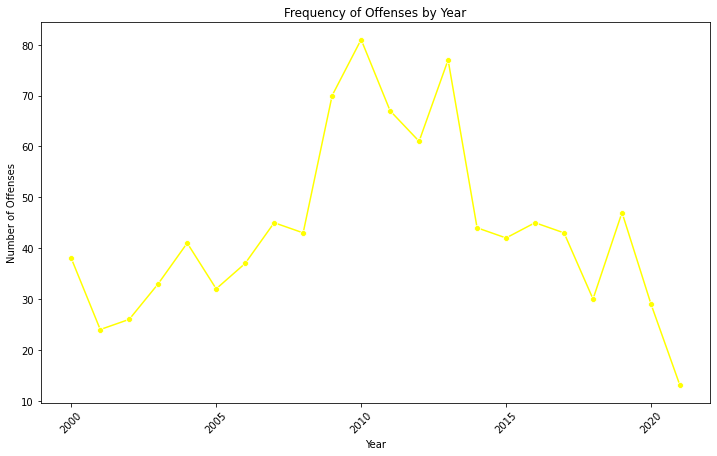

In [0]:
# Aggregate data by Penalty_Year
offenses_by_year = df_pharmacy.groupBy("Penalty_Year").count().orderBy("Penalty_Year")

# Convert to Pandas DataFrame
offenses_by_year_pd = offenses_by_year.toPandas()

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(data=offenses_by_year_pd, x='Penalty_Year', y='count', marker='o', color='yellow')
plt.title('Frequency of Offenses by Year')
plt.xlabel('Year')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.show()


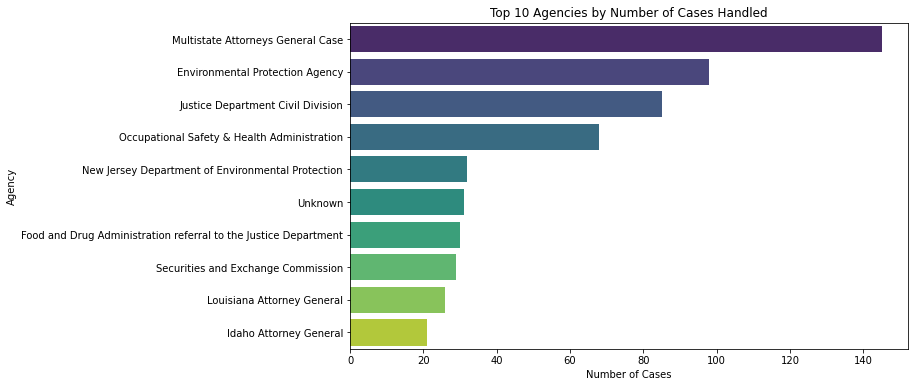

In [0]:
# Aggregate data by Agency and count cases
cases_by_agency = df_pharmacy.groupBy("Agency").count().orderBy("count", ascending=False).limit(10)

# Convert to Pandas DataFrame
cases_by_agency_pd = cases_by_agency.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Agency', data=cases_by_agency_pd, palette='viridis')
plt.title('Top 10 Agencies by Number of Cases Handled')
plt.xlabel('Number of Cases')
plt.ylabel('Agency')
plt.show()


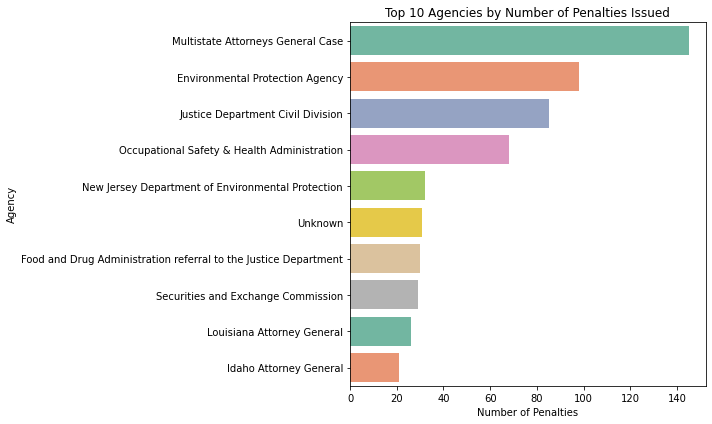

In [0]:
# Aggregate data by Agency and count the number of penalties
penalties_by_agency = df_pharmacy.groupBy("Agency").count().orderBy("count", ascending=False)

# Convert to Pandas DataFrame for visualization
penalties_by_agency_pd = penalties_by_agency.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Agency', data=penalties_by_agency_pd.head(10), palette='Set2')  # Limit to top 10 for readability
plt.title('Top 10 Agencies by Number of Penalties Issued')
plt.xlabel('Number of Penalties')
plt.ylabel('Agency')
plt.tight_layout()
plt.show()

In [0]:
# Create temporary view
df_pharmacy.createOrReplaceTempView("pharmacy_dataset")

# check  query
spark.sql("SELECT Company, Parent_Company FROM pharmacy_dataset LIMIT 5").show(truncate=False)


+-------------------------------------+-------------------+
|Company                              |Parent_Company     |
+-------------------------------------+-------------------+
|Abbott Laboratories                  |Abbott Laboratories|
|Abbott Laboratories Inc.             |AbbVie             |
|Abbott Laboratories Inc.             |AbbVie             |
|Abbott Laboratories Puerto Rico, Inc.|Abbott Laboratories|
|Acclarent Inc.                       |Johnson & Johnson  |
+-------------------------------------+-------------------+



In [0]:
%sql
SELECT COUNT(DISTINCT `Id`) AS distinct_studies FROM clinicaltrial_2023


distinct_studies 483422

In [0]:
%sql
SELECT `Study Type`, COUNT(*) AS frequency 
FROM clinicaltrial_2023 
GROUP BY `Study Type` 
ORDER BY frequency DESC


Study Type frequency INTERVENTIONAL 371384 OBSERVATIONAL 110221 EXPANDED_ACCESS 928 Unknown 889

In [0]:
%sql
SELECT `Conditions`, COUNT(*) AS frequency 
FROM clinicaltrial_2023 
GROUP BY `Conditions` 
ORDER BY frequency DESC 
LIMIT 5


Conditions frequency Healthy 7997 Breast Cancer 4556 Prostate Cancer 2650 Asthma 2309 Obesity 2284

In [0]:
%sql
SELECT `Sponsor`, COUNT(*) AS trials 
FROM clinicaltrial_2023 
WHERE `Sponsor` NOT IN (SELECT `Parent_Company` FROM pharmacy_dataset) 
GROUP BY `Sponsor` 
ORDER BY trials DESC 
LIMIT 10


Sponsor trials National Cancer Institute (NCI) 3410 Assiut University 3335 Cairo University 3023 Assistance Publique - Hôpitaux de Paris 2951 Mayo Clinic 2766 M.D. Anderson Cancer Center 2702 Novartis Pharmaceuticals 2393 National Institute of Allergy and Infectious Diseases (NIAID) 2340 Massachusetts General Hospital 2263 National Taiwan University Hospital 2181

In [0]:
from pyspark.sql.functions import to_date, month, year

# Assuming "Completion Date" is the name of the column with dates
completed_studies_2023 = (df_filtered
                          .withColumn("Completion Date", to_date("Completion Date", "dd MMMM yyyy"))
                          .filter((year("Completion Date") == 2023) & (df_final["Study Status"] == "Completed"))
                          .groupBy(month("Completion Date").alias("Month"))
                          .count()
                          .orderBy("Month"))

# Collect the data to the driver for plotting
completed_studies_data = completed_studies_2023.collect()


In [0]:
completed_studies_data

Out[41]: []

In [0]:
%sql
SELECT YEAR(TO_DATE(`Start Date`, 'yyyy-MM-dd')) AS start_year, COUNT(*) AS total_studies
FROM clinicaltrial_2023
GROUP BY start_year
ORDER BY start_year


start_year total_studies null 219840 1916 1 1917 1 1963 1 1968 1 1972 1 1973 2 1975 1 1976 5 1977 8 1978 2 1979 4 1980 2 1981 2 1983 5 1984 10 1985 4 1986 2 1987 3 1988 7 1989 17 1990 18 1991 25 1992 28 1993 41 1994 39 1995 56 1996 84 1997 95 1998 117 1999 172 2000 245 2001 282 2002 330 2003 468 2004 577 2005 682 2006 926 2007 1047 2008 1239 2009 1535 2010 1879 2011 2236 2012 2871 2013 3701 2014 5044 2015 7596 2016 11279 2017 25743 2018 28761 2019 30318 2020 31332 2021 35080 2022 32643 2023 30381 2024 6475 2025 129 2026 17 2027 5 2028 1 2030 3 2097 3

In [0]:
%sql
SELECT `Study Type`, AVG(CAST(`Enrollment` AS INT)) AS avg_enrollment
FROM clinicaltrial_2023
GROUP BY `Study Type`
ORDER BY avg_enrollment DESC


Study Type avg_enrollment OBSERVATIONAL 19074.312677788177 INTERVENTIONAL 1237.998302156316 Unknown null EXPANDED_ACCESS null

In [0]:
%sql
SELECT `Collaborators`, COUNT(*) AS total_collaborations
FROM clinicaltrial_2023
WHERE `Collaborators` IS NOT NULL
GROUP BY `Collaborators`
ORDER BY total_collaborations DESC
LIMIT 5


Collaborators total_collaborations Unknown 325505 National Cancer Institute (NCI) 7918 National Heart", Lung," and Blood Institute (NHLBI) 1689 National Institute of Mental Health (NIMH) 1590 National Institute on Drug Abuse (NIDA) 1394